In [6]:
import requests
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import math

from fathon import fathonUtils as fu
import fathon

from tqdm import tqdm
import datetime
import os


In [ ]:
# yf data for sp500 100 companies

# url of the source
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Read and print the stock tickers that make up S&P500
tickers = pd.read_html(url)[0]

ticker_symbols = tickers['Symbol'].to_list()
# Clean the symbols
ticker_symbols = [ticker.replace(".","-") for ticker in ticker_symbols]

limited_ticker_symbols = ticker_symbols[:10]

# Get the data for this tickers from yfinance
sp_500_data = yf.download(limited_ticker_symbols,start='2000-1-1',end='2025-1-1', auto_adjust=True)['Close']
sp_500_data.head()


[*********************100%***********************]  10 of 10 completed


Ticker,A,ABBV,ABT,ACN,ADBE,AES,AFL,AMD,AOS,MMM
Date,,,,,,,,,,
2000-01-03,43.199894,NaN,8.170225,NaN,16.274672,23.707541,6.703297,15.500,2.277506,19.516693
2000-01-04,39.899910,NaN,7.936790,NaN,14.909398,22.767416,6.525410,14.625,2.244688,18.741194
2000-01-05,37.424911,NaN,7.922199,NaN,15.204171,23.012661,6.487963,15.000,2.238125,19.284046
2000-01-06,35.999916,NaN,8.199403,NaN,15.328292,23.196592,6.619036,16.000,2.205307,20.835039
2000-01-07,38.999886,NaN,8.286942,NaN,16.072981,23.646227,6.750103,16.250,2.297194,21.248648


In [7]:
# yf commodity data

tickers_names = {
    # Energy
    "CL=F": "Crude Oil",
    "BZ=F": "Brent Crude Oil",
    "NG=F": "Natural Gas",
    "RB=F": "RBOB Gasoline",
    "HO=F": "Heating Oil",
    "QM=F": "E-mini Crude Oil",
    "QG=F": "E-mini Natural Gas",

    # Metals
    "GC=F": "Gold",
    "SI=F": "Silver",
    "HG=F": "Copper",
    "PL=F": "Platinum",
    "PA=F": "Palladium",

    # Agriculture - Grains & Softs
    "ZC=F": "Corn",
    "ZW=F": "Wheat",
    "ZS=F": "Soybeans",
    "ZR=F": "Rough Rice",
    "KC=F": "Coffee",
    "SB=F": "Sugar #11",
    "CC=F": "Cocoa",
    "CT=F": "Cotton",
    "OJ=F": "Orange Juice",

    # Livestock
    "LE=F": "Live Cattle",
    "HE=F": "Lean Hogs",
    "GF=F": "Feeder Cattle",

    # Other
    "LBS=F": "Lumber"
}



In [34]:
# Get commodity data from Yahoo Finance
tickers = list(tickers_names.keys())

# Create a progress bar
pbar = tqdm(tickers, desc="Fetching data")

# Initialize an empty DataFrame
commod_data = pd.DataFrame()

# Fetch data for each ticker
for ticker in pbar:
    try:
        data = yf.download(ticker, start="1900-01-01", end="2025-01-01", progress=False)
        if not data.empty:
            commod_data[ticker] = data['Close']
    except Exception as e:
        print(f"Error fetching {ticker}: {e}")

# Drop any columns with all NaN values
commod_data = commod_data.dropna(axis=1, how='all')

Fetching data:   0%|          | 0/25 [00:00<?, ?it/s]/var/folders/z5/d2ytmy3d2h18qcqwb9v71w2m0000gq/T/ipykernel_56049/141193573.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="1900-01-01", end="2025-01-01", progress=False)
/var/folders/z5/d2ytmy3d2h18qcqwb9v71w2m0000gq/T/ipykernel_56049/141193573.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="1900-01-01", end="2025-01-01", progress=False)
/var/folders/z5/d2ytmy3d2h18qcqwb9v71w2m0000gq/T/ipykernel_56049/141193573.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="1900-01-01", end="2025-01-01", progress=False)
Fetching data:  12%|█▏        | 3/25 [00:00<00:01, 21.06it/s]/var/folders/z5/d2ytmy3d2h18qcqwb9v71w2m0000gq/T/ipykernel_56049/141193573.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to Tr

In [37]:
commod_data.head(10)

,CL=F,BZ=F,NG=F,RB=F,HO=F,QM=F,QG=F,GC=F,SI=F,HG=F,...,ZR=F,KC=F,SB=F,CC=F,CT=F,OJ=F,LE=F,HE=F,GF=F,LBS=F
Date,,,,,,,,,,,,,,,,,,,,,
2000-08-23,32.049999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,701.099976,74.599998,10.48,740.0,63.880001,NaN,NaN,NaN,NaN,227.300003
2000-08-24,31.629999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,698.700012,77.800003,10.36,750.0,63.520000,NaN,NaN,NaN,NaN,229.000000
2000-08-25,32.049999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,696.549988,77.750000,10.82,744.0,64.730003,NaN,NaN,NaN,NaN,223.800003
2000-08-28,32.869999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,675.000000,75.199997,10.80,749.0,64.839996,NaN,NaN,NaN,NaN,222.000000
2000-08-29,32.720001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,685.000000,74.699997,10.73,744.0,65.199997,NaN,NaN,NaN,NaN,215.300003
2000-08-30,33.400002,NaN,4.805,NaN,NaN,NaN,NaN,273.899994,4.930,0.8850,...,650.000000,73.900002,10.76,760.0,64.750000,NaN,NaN,NaN,NaN,219.199997
2000-08-31,33.099998,NaN,4.780,NaN,NaN,NaN,NaN,278.299988,5.003,0.8850,...,627.000000,74.500000,10.56,745.0,63.369999,NaN,NaN,NaN,NaN,221.800003
2000-09-01,33.380001,NaN,4.835,NaN,0.9764,NaN,NaN,277.000000,5.004,0.8890,...,NaN,75.000000,10.82,757.0,63.490002,NaN,NaN,NaN,NaN,216.500000
2000-09-05,33.799999,NaN,4.960,NaN,0.9797,NaN,NaN,275.799988,4.998,0.9060,...,625.000000,73.099998,10.43,775.0,64.540001,NaN,NaN,NaN,NaN,217.600006


In [35]:
commod_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6115 entries, 2000-08-23 to 2024-12-31
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CL=F    6115 non-null   float64
 1   BZ=F    4332 non-null   float64
 2   NG=F    6110 non-null   float64
 3   RB=F    6065 non-null   float64
 4   HO=F    6107 non-null   float64
 5   QM=F    5629 non-null   float64
 6   QG=F    5640 non-null   float64
 7   GC=F    6105 non-null   float64
 8   SI=F    6106 non-null   float64
 9   HG=F    6107 non-null   float64
 10  PL=F    5428 non-null   float64
 11  PA=F    5668 non-null   float64
 12  ZC=F    6074 non-null   float64
 13  ZW=F    6085 non-null   float64
 14  ZS=F    6092 non-null   float64
 15  ZR=F    6093 non-null   float64
 16  KC=F    6103 non-null   float64
 17  SB=F    6105 non-null   float64
 18  CC=F    6105 non-null   float64
 19  CT=F    6105 non-null   float64
 20  OJ=F    5842 non-null   float64
 21  LE=F    5959 non-nu

In [36]:
commod_data.tail(10)

,CL=F,BZ=F,NG=F,RB=F,HO=F,QM=F,QG=F,GC=F,SI=F,HG=F,...,ZR=F,KC=F,SB=F,CC=F,CT=F,OJ=F,LE=F,HE=F,GF=F,LBS=F
Date,,,,,,,,,,,,,,,,,,,,,
2024-12-17,70.080002,73.190002,3.308,1.9439,2.2279,70.080002,3.308,2644.399902,30.573000,4.0915,...,1498.0,325.450012,19.840000,11765.0,68.690002,526.400024,192.250000,83.199997,257.475006,NaN
2024-12-18,70.580002,73.389999,3.374,1.9428,2.2550,70.580002,3.374,2636.500000,30.410000,4.1000,...,1481.5,333.149994,19.650000,12565.0,68.080002,535.400024,191.300003,83.699997,257.000000,NaN
2024-12-19,69.910004,72.879997,3.584,1.9228,2.2377,69.379997,3.584,2592.199951,29.094000,4.0205,...,1441.0,323.750000,19.400000,12107.0,67.910004,547.700012,190.350006,83.625000,254.475006,NaN
2024-12-20,69.459999,72.940002,3.748,1.9416,2.2317,69.459999,3.748,2628.699951,29.660000,4.0410,...,1407.5,325.000000,19.510000,11954.0,68.059998,528.950012,191.324997,85.925003,255.600006,NaN
2024-12-23,69.239998,72.629997,3.656,1.9383,2.2263,69.239998,3.656,2612.300049,29.888000,4.0230,...,1401.0,327.250000,19.540001,11746.0,69.419998,502.850006,190.975006,84.375000,256.600006,NaN
2024-12-24,70.099998,73.580002,3.946,1.9589,2.2215,70.099998,3.946,2620.000000,29.974001,4.0495,...,1405.0,328.600006,19.540001,11852.0,68.779999,511.450012,190.800003,84.375000,255.850006,NaN
2024-12-26,69.620003,73.260002,3.715,1.9458,2.2053,69.620003,3.715,2638.800049,30.047001,4.0720,...,1391.5,324.649994,19.260000,11027.0,68.750000,496.450012,192.774994,84.199997,259.299988,NaN
2024-12-27,70.599998,74.169998,3.514,1.9582,2.2448,70.599998,3.383,2617.199951,29.655001,4.0625,...,1376.0,322.649994,19.370001,10124.0,68.889999,501.899994,193.500000,84.150002,261.375000,NaN
2024-12-30,70.989998,74.389999,3.936,1.9763,2.2995,70.989998,3.936,2606.100098,29.106001,4.0455,...,1361.0,321.000000,19.129999,11507.0,68.480003,494.500000,194.074997,81.625000,261.625000,NaN


In [38]:
import itertools

def calculate_ghe_q1(series):
    series = np.log(series / series.shift(1)).dropna()
    # Ensure series has enough data points
    if len(series) < 50: # Minimum length for any meaningful Hurst calc, often needs more
        return np.nan, np.nan # Return (Hurst, F_q1_values)

    a = fu.toAggregated(series)
    pymfdfa = fathon.MFDFA(a)

    # Define window sizes
    min_window = 12
    # max_window should be less than the length of the series for meaningful segments
    max_window = int(len(series) // 4) # A common heuristic for max window size
    if max_window < min_window + 5: # Ensure at least a few windows
        max_window = len(series) - 1 # Fallback, but might be too large for good fits
        if max_window <= min_window: # If still too small, cannot compute
            return np.nan, np.nan

    # Generate window_sizes using log-scale for better distribution
    window_sizes = np.array([int(10**x) for x in np.arange(math.log10(min_window), math.log10(max_window), 0.25)])
    window_sizes = np.unique(window_sizes) # Remove potential duplicates from int conversion
    window_sizes = window_sizes[window_sizes < len(series)] # Ensure windows don't exceed series length
    if len(window_sizes) < 2: # Need at least 2 distinct window sizes for fitting
        return np.nan, np.nan


    # Define q-list including q=1.0
    qs = np.arange(-5, 5.1, 0.1) # Ensure 5.0 is included if needed, changed upper bound
    # Find the index where q is closest to 1.0
    index_qs_equals_1 = np.where(np.isclose(qs, 1.0))[0]
    if len(index_qs_equals_1) == 0:
        print("Warning: q=1.0 not found in qs list. Adjusting qs range.")
        return np.nan, np.nan
    index_qs_equals_1 = index_qs_equals_1[0] # Get the first (and likely only) index

    revSeg = True
    polOrd = 1

    # Compute fluctuation vector
    n, F = pymfdfa.computeFlucVec(window_sizes, qs, revSeg=revSeg, polOrd=polOrd)

    # Get the F values specifically for q=1.0
    F_q1_values = F[index_qs_equals_1, :]

    # Fit to get Hurst exponent for q=1.0
    list_H, _ = pymfdfa.fitFlucVec() # Pass only q=1 for specific fit if needed, otherwise fit all

    # The fitFlucVec method (as defined in the fathon code you shared)
    # fits for ALL q values in self.qList that were passed to computeFlucVec.
    # So, list_H will contain Hurst exponents for all qs.
    # We need the one corresponding to q=1.0.
    H_q1 = list_H[index_qs_equals_1]

    return H_q1, F_q1_values # Return both H(q=1) and its F values
    

# --- End of user-provided function ---

def implement_pair_trading_strategy(data, n_pairs_to_select=10):
    """
    Implements the pair trading strategy based on GHE(q=1).

    Args:
        data (pd.DataFrame): DataFrame of historical 'Close' prices for multiple stocks.
                             Columns are ticker symbols, index is date.
        n_pairs_to_select (int): Number of pairs with lowest GHE(q=1) to select each period.

    Returns:
        pd.DataFrame: A DataFrame showing selected pairs for each 6-month trading period.
    """
    # Ensure data is sorted by date
    data = data.sort_index()

    # Calculate log returns for all stocks
    log_returns = np.log(data / data.shift(1)).dropna()

    # Get all unique ticker symbols
    ticker_symbols = data.columns.tolist()

    # Generate all possible unique pairs (A, B) where A < B alphabetically
    # This ensures each pair is considered only once and in a consistent order
    all_pairs = list(itertools.combinations(sorted(ticker_symbols), 2))
    print(f"Total number of possible pairs: {len(all_pairs)}")

    # Define the research period for rolling selection
    start_date = pd.to_datetime('2001-01-01')
    end_date = pd.to_datetime('2025-01-01')

    # Define time windows
    # Selection every 6 months
    trading_periods = pd.date_range(start=start_date, end=end_date, freq='6M') # 'left' to match 'beginning of each 6 month'

    selected_pairs_over_time = []

    for trade_start_date in trading_periods:
        # Define the one-year lookback period for GHE calculation
        calc_end_date = trade_start_date - pd.Timedelta(days=1) # End of previous day
        calc_start_date = calc_end_date - pd.Timedelta(days=365) # Approx one year prior (will handle 252 observations later)

        # Filter data for the calculation window
        # Ensure we have enough data points (approx. 252 trading days)
        current_calc_data = data.loc[calc_start_date:calc_end_date].dropna(axis=1) # Drop cols with NaN in window

        # Ensure enough observations for 1 year (252 trading days)
        if len(current_calc_data) < 200: # Use a slightly lower threshold for robustness
            print(f"Skipping period starting {trade_start_date}: Not enough data for GHE calculation (only {len(current_calc_data)} days).")
            continue

        # Get the log returns for the current calculation window
        current_log_returns = np.log(current_calc_data / current_calc_data.shift(1)).dropna()

        # Filter pairs to only include those present in current_calc_data
        available_tickers = current_calc_data.columns.tolist()
        current_available_pairs = []
        for pair in all_pairs:
            if pair[0] in available_tickers and pair[1] in available_tickers:
                current_available_pairs.append(pair)

        if not current_available_pairs:
            print(f"Skipping period starting {trade_start_date}: No valid pairs with sufficient data.")
            continue

        print(f"\n--- Processing for trading period starting {trade_start_date.strftime('%Y-%m-%d')} ---")
        print(f"  GHE calculation uses data from {current_calc_data.index.min().strftime('%Y-%m-%d')} to {current_calc_data.index.max().strftime('%Y-%m-%d')}")
        print(f"  Number of observations in calculation window: {len(current_calc_data)}")

        spread_ghe_values = []

        for pair_a_symbol, pair_b_symbol in current_available_pairs:
            # Extract prices and log returns for the current pair
            prices_A = current_calc_data[pair_a_symbol]
            prices_B = current_calc_data[pair_b_symbol]
            ret_A = current_log_returns[pair_a_symbol]
            ret_B = current_log_returns[pair_b_symbol]

            # Calculate h (hedge ratio for volatility)
            # Ensure std dev is not zero to avoid division by zero
            if ret_A.std() == 0 or ret_B.std() == 0:
                h = np.nan
            else:
                h = ret_A.std() / ret_B.std()

            if np.isnan(h):
                continue

            # Calculate the spread: S = P_A - h * P_B
            # Use actual prices for spread, not log returns, as per formula (3)
            spread = prices_A - h * prices_B

            # Normalize the spread for GHE calculation if preferred (optional, but good practice for time series features)
            # spread = (spread - spread.mean()) / spread.std()

            # Calculate GHE(q=1) for the spread
            # *** THIS IS WHERE YOUR calculate_ghe_q1 FUNCTION IS CRITICAL ***
            ghe_q1_value, ghe_f_q1_values = calculate_ghe_q1(spread.dropna())

            if not np.isnan(ghe_q1_value):
                spread_ghe_values.append({
                    'Pair': (pair_a_symbol, pair_b_symbol),
                    'Hedge Ratio (h)': h,
                    'GHE_q1': ghe_q1_value
                })

        # Sort pairs by GHE(q=1) in ascending order (lowest indicates strong mean reversion)
        spread_ghe_values.sort(key=lambda x: x['GHE_q1'])

        # Select the top N pairs
        top_n_pairs = spread_ghe_values[:n_pairs_to_select]
        print(top_n_pairs)
        for pair_info in top_n_pairs:
            selected_pairs_over_time.append({
                'Trading Period Start': trade_start_date,
                'Pair': pair_info['Pair'],
                'Hedge Ratio (h)': pair_info['Hedge Ratio (h)'],
                'GHE_q1': pair_info['GHE_q1']
            })

    return pd.DataFrame(selected_pairs_over_time)

# --- How to run the strategy (after you provide calculate_ghe_q1) ---
# Assuming 'data' DataFrame is populated from your yfinance download
strategy_results = implement_pair_trading_strategy(commod_data, n_pairs_to_select=1)
print(strategy_results.head())
print(strategy_results.info())



/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/var/folders/z5/d2ytmy3d2h18qcqwb9v71w2m0000gq/T/ipykernel_56049/233809009.py:93: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trading_periods = pd.date_range(start=start_date, end=end_date, freq='6M') # 'left' to match 'beginning of each 6 month'
/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Total number of possible pairs: 300
Skipping period starting 2001-01-31 00:00:00: Not enough data for GHE calculation (only 109 days).

--- Processing for trading period starting 2001-07-31 ---
  GHE calculation uses data from 2000-08-23 to 2001-07-30
  Number of observations in calculation window: 234
[{'Pair': ('CT=F', 'KC=F'), 'Hedge Ratio (h)': 0.816682802599199, 'GHE_q1': 0.2924771937568251}]

--- Processing for trading period starting 2002-01-31 ---
  GHE calculation uses data from 2001-01-30 to 2002-01-30
  Number of observations in calculation window: 248


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('HO=F', 'RB=F'), 'Hedge Ratio (h)': 0.9153629267234001, 'GHE_q1': 0.4341276674363819}]

--- Processing for trading period starting 2002-07-31 ---
  GHE calculation uses data from 2001-07-30 to 2002-07-30
  Number of observations in calculation window: 247


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('GF=F', 'LE=F'), 'Hedge Ratio (h)': 0.6596305927636318, 'GHE_q1': 0.3468896532083887}]

--- Processing for trading period starting 2003-01-31 ---
  GHE calculation uses data from 2002-01-30 to 2003-01-30
  Number of observations in calculation window: 251


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('PA=F', 'ZC=F'), 'Hedge Ratio (h)': 1.1895153703970822, 'GHE_q1': 0.33467180658749274}]

--- Processing for trading period starting 2003-07-31 ---
  GHE calculation uses data from 2002-07-30 to 2003-07-30
  Number of observations in calculation window: 252


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('NG=F', 'QG=F'), 'Hedge Ratio (h)': 1.002236235574926, 'GHE_q1': 0.34172896036836903}]

--- Processing for trading period starting 2004-01-31 ---
  GHE calculation uses data from 2003-01-30 to 2004-01-30
  Number of observations in calculation window: 250


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('NG=F', 'QG=F'), 'Hedge Ratio (h)': 1.0023605302752878, 'GHE_q1': 0.2929844271130249}]

--- Processing for trading period starting 2004-07-31 ---
  GHE calculation uses data from 2003-07-31 to 2004-07-30
  Number of observations in calculation window: 249


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('NG=F', 'QG=F'), 'Hedge Ratio (h)': 1.0109360084319563, 'GHE_q1': 0.31138329985251245}]

--- Processing for trading period starting 2005-01-31 ---
  GHE calculation uses data from 2004-02-02 to 2005-01-28
  Number of observations in calculation window: 249


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('CL=F', 'QM=F'), 'Hedge Ratio (h)': 0.9785406623565017, 'GHE_q1': 0.254778750075682}]

--- Processing for trading period starting 2005-07-31 ---
  GHE calculation uses data from 2004-07-30 to 2005-07-29
  Number of observations in calculation window: 251


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('HO=F', 'RB=F'), 'Hedge Ratio (h)': 0.9436933044417629, 'GHE_q1': 0.268595586486074}]

--- Processing for trading period starting 2006-01-31 ---
  GHE calculation uses data from 2005-01-31 to 2006-01-30
  Number of observations in calculation window: 251


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('KC=F', 'OJ=F'), 'Hedge Ratio (h)': 1.3452555774173807, 'GHE_q1': 0.24965333492970904}]

--- Processing for trading period starting 2006-07-31 ---
  GHE calculation uses data from 2005-08-01 to 2006-07-28
  Number of observations in calculation window: 249


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('HO=F', 'RB=F'), 'Hedge Ratio (h)': 0.7240258695965156, 'GHE_q1': 0.34477982626176207}]

--- Processing for trading period starting 2007-01-31 ---
  GHE calculation uses data from 2006-01-30 to 2007-01-30
  Number of observations in calculation window: 252


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('HG=F', 'NG=F'), 'Hedge Ratio (h)': 0.5886428999628014, 'GHE_q1': 0.39431337407936506}]

--- Processing for trading period starting 2007-07-31 ---
  GHE calculation uses data from 2006-07-31 to 2007-07-30
  Number of observations in calculation window: 252


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('HG=F', 'NG=F'), 'Hedge Ratio (h)': 0.5359982781822831, 'GHE_q1': 0.2281263371023916}]

--- Processing for trading period starting 2008-01-31 ---
  GHE calculation uses data from 2007-01-30 to 2008-01-30
  Number of observations in calculation window: 253


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('GC=F', 'LE=F'), 'Hedge Ratio (h)': 1.1170724352983574, 'GHE_q1': 0.36075431290853266}]

--- Processing for trading period starting 2008-07-31 ---
  GHE calculation uses data from 2007-07-31 to 2008-07-30
  Number of observations in calculation window: 253


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('BZ=F', 'HE=F'), 'Hedge Ratio (h)': 0.9327907038820397, 'GHE_q1': 0.19874724366739635}]

--- Processing for trading period starting 2009-01-31 ---
  GHE calculation uses data from 2008-01-31 to 2009-01-30
  Number of observations in calculation window: 253


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('CL=F', 'QM=F'), 'Hedge Ratio (h)': 1.044297861122221, 'GHE_q1': 0.0596502901085699}]

--- Processing for trading period starting 2009-07-31 ---
  GHE calculation uses data from 2008-07-30 to 2009-07-30
  Number of observations in calculation window: 253


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('CT=F', 'QM=F'), 'Hedge Ratio (h)': 0.5843708460155436, 'GHE_q1': 0.2451236196573648}]

--- Processing for trading period starting 2010-01-31 ---
  GHE calculation uses data from 2009-01-30 to 2010-01-29
  Number of observations in calculation window: 252


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('CL=F', 'QM=F'), 'Hedge Ratio (h)': 1.002780291497685, 'GHE_q1': 0.2562263291207808}]

--- Processing for trading period starting 2010-07-31 ---
  GHE calculation uses data from 2009-07-30 to 2010-07-30
  Number of observations in calculation window: 253


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('NG=F', 'QG=F'), 'Hedge Ratio (h)': 1.068590013479672, 'GHE_q1': 0.243131893391616}]

--- Processing for trading period starting 2011-01-31 ---
  GHE calculation uses data from 2010-02-01 to 2011-01-28
  Number of observations in calculation window: 252


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('CL=F', 'QM=F'), 'Hedge Ratio (h)': 1.003817501938786, 'GHE_q1': 0.27926335295305305}]

--- Processing for trading period starting 2011-07-31 ---
  GHE calculation uses data from 2010-07-30 to 2011-07-29
  Number of observations in calculation window: 253


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('QM=F', 'SI=F'), 'Hedge Ratio (h)': 0.8095084093077989, 'GHE_q1': 0.3772532776813666}]

--- Processing for trading period starting 2012-01-31 ---
  GHE calculation uses data from 2011-01-31 to 2012-01-30
  Number of observations in calculation window: 252


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('HO=F', 'QG=F'), 'Hedge Ratio (h)': 0.7260232650881134, 'GHE_q1': 0.29010411046302825}]

--- Processing for trading period starting 2012-07-31 ---
  GHE calculation uses data from 2011-08-01 to 2012-07-30
  Number of observations in calculation window: 252


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('CL=F', 'QM=F'), 'Hedge Ratio (h)': 1.0001340413718185, 'GHE_q1': 0.09205752113025162}]

--- Processing for trading period starting 2013-01-31 ---
  GHE calculation uses data from 2012-01-31 to 2013-01-30
  Number of observations in calculation window: 251


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('NG=F', 'QG=F'), 'Hedge Ratio (h)': 1.00439748164218, 'GHE_q1': 0.23522518850273497}]

--- Processing for trading period starting 2013-07-31 ---
  GHE calculation uses data from 2012-07-30 to 2013-07-30
  Number of observations in calculation window: 251


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('NG=F', 'QG=F'), 'Hedge Ratio (h)': 1.0007123789995607, 'GHE_q1': 0.11923520704552043}]

--- Processing for trading period starting 2014-01-31 ---
  GHE calculation uses data from 2013-01-30 to 2014-01-30
  Number of observations in calculation window: 253


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('NG=F', 'QG=F'), 'Hedge Ratio (h)': 1.0290280334989474, 'GHE_q1': 0.26744394571280466}]

--- Processing for trading period starting 2014-07-31 ---
  GHE calculation uses data from 2013-07-30 to 2014-07-30
  Number of observations in calculation window: 253


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('NG=F', 'QG=F'), 'Hedge Ratio (h)': 1.008767845527826, 'GHE_q1': 0.31984277459049326}]

--- Processing for trading period starting 2015-01-31 ---
  GHE calculation uses data from 2014-01-30 to 2015-01-30
  Number of observations in calculation window: 253


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('HO=F', 'QG=F'), 'Hedge Ratio (h)': 0.43918299548223044, 'GHE_q1': 0.30427461669101974}]

--- Processing for trading period starting 2015-07-31 ---
  GHE calculation uses data from 2014-07-30 to 2015-07-30
  Number of observations in calculation window: 253


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('NG=F', 'QG=F'), 'Hedge Ratio (h)': 1.0006401609125952, 'GHE_q1': 0.22449585611905218}]

--- Processing for trading period starting 2016-01-31 ---
  GHE calculation uses data from 2015-01-30 to 2016-01-29
  Number of observations in calculation window: 252


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('NG=F', 'QG=F'), 'Hedge Ratio (h)': 0.9990902395474942, 'GHE_q1': 0.1635611318668835}]

--- Processing for trading period starting 2016-07-31 ---
  GHE calculation uses data from 2015-07-31 to 2016-07-29
  Number of observations in calculation window: 252


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('NG=F', 'QG=F'), 'Hedge Ratio (h)': 1.0012578632098637, 'GHE_q1': 0.14279291519012904}]

--- Processing for trading period starting 2017-01-31 ---
  GHE calculation uses data from 2016-02-01 to 2017-01-30
  Number of observations in calculation window: 250


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('NG=F', 'QG=F'), 'Hedge Ratio (h)': 1.0055478716523425, 'GHE_q1': 0.24683556922919123}]

--- Processing for trading period starting 2017-07-31 ---
  GHE calculation uses data from 2016-08-01 to 2017-07-28
  Number of observations in calculation window: 249


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('BZ=F', 'ZC=F'), 'Hedge Ratio (h)': 1.4316870922132992, 'GHE_q1': 0.2497690127836016}]

--- Processing for trading period starting 2018-01-31 ---
  GHE calculation uses data from 2017-01-30 to 2018-01-30
  Number of observations in calculation window: 253


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('CL=F', 'QM=F'), 'Hedge Ratio (h)': 0.9984011918366704, 'GHE_q1': 0.087484212831508}]

--- Processing for trading period starting 2018-07-31 ---
  GHE calculation uses data from 2017-07-31 to 2018-07-30
  Number of observations in calculation window: 252


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('NG=F', 'QG=F'), 'Hedge Ratio (h)': 1.042671763379836, 'GHE_q1': 0.2718472889695337}]

--- Processing for trading period starting 2019-01-31 ---
  GHE calculation uses data from 2018-01-30 to 2019-01-30
  Number of observations in calculation window: 252


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('NG=F', 'QG=F'), 'Hedge Ratio (h)': 1.077329681642682, 'GHE_q1': 0.11502877683308012}]

--- Processing for trading period starting 2019-07-31 ---
  GHE calculation uses data from 2018-07-30 to 2019-07-30
  Number of observations in calculation window: 252


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('CL=F', 'QM=F'), 'Hedge Ratio (h)': 1.0173720354707756, 'GHE_q1': 0.201920066905538}]

--- Processing for trading period starting 2020-01-31 ---
  GHE calculation uses data from 2019-01-30 to 2020-01-30
  Number of observations in calculation window: 253


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('CL=F', 'QM=F'), 'Hedge Ratio (h)': 0.9968747036550121, 'GHE_q1': 0.2811036263738999}]

--- Processing for trading period starting 2020-07-31 ---
  GHE calculation uses data from 2019-07-31 to 2020-07-30
  Number of observations in calculation window: 253


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('NG=F', 'QG=F'), 'Hedge Ratio (h)': 0.9951261232649709, 'GHE_q1': 0.13529344861394285}]

--- Processing for trading period starting 2021-01-31 ---
  GHE calculation uses data from 2020-01-31 to 2021-01-29
  Number of observations in calculation window: 252


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('CT=F', 'KC=F'), 'Hedge Ratio (h)': 0.6694667961169278, 'GHE_q1': 0.3253327100445694}]

--- Processing for trading period starting 2021-07-31 ---
  GHE calculation uses data from 2020-07-30 to 2021-07-30
  Number of observations in calculation window: 253


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('NG=F', 'QG=F'), 'Hedge Ratio (h)': 0.9340179716591794, 'GHE_q1': 0.23160885179339924}]

--- Processing for trading period starting 2022-01-31 ---
  GHE calculation uses data from 2021-02-01 to 2022-01-28
  Number of observations in calculation window: 252


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('CL=F', 'QM=F'), 'Hedge Ratio (h)': 0.9985292256003317, 'GHE_q1': 0.18041179648569147}]

--- Processing for trading period starting 2022-07-31 ---
  GHE calculation uses data from 2021-07-30 to 2022-07-29
  Number of observations in calculation window: 252


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('CL=F', 'QM=F'), 'Hedge Ratio (h)': 1.00049596403717, 'GHE_q1': 0.1322966723862529}]

--- Processing for trading period starting 2023-01-31 ---
  GHE calculation uses data from 2022-01-31 to 2023-01-30
  Number of observations in calculation window: 251


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('PL=F', 'ZS=F'), 'Hedge Ratio (h)': 1.0867323098170134, 'GHE_q1': 0.2724092817304973}]

--- Processing for trading period starting 2023-07-31 ---
  GHE calculation uses data from 2022-08-01 to 2023-07-28
  Number of observations in calculation window: 250


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('GF=F', 'ZC=F'), 'Hedge Ratio (h)': 0.5343053041764007, 'GHE_q1': 0.2483984146224394}]

--- Processing for trading period starting 2024-01-31 ---
  GHE calculation uses data from 2023-01-30 to 2024-01-30
  Number of observations in calculation window: 252


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('NG=F', 'QG=F'), 'Hedge Ratio (h)': 0.9894343491840321, 'GHE_q1': 0.31244008899677944}]

--- Processing for trading period starting 2024-07-31 ---
  GHE calculation uses data from 2023-07-31 to 2024-07-30
  Number of observations in calculation window: 252


/Users/alt2005/hurst_exponent_pair_trading/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Pair': ('HE=F', 'ZR=F'), 'Hedge Ratio (h)': 0.06346901834286496, 'GHE_q1': 0.2547481636718484}]
  Trading Period Start          Pair  Hedge Ratio (h)    GHE_q1
0           2001-07-31  (CT=F, KC=F)         0.816683  0.292477
1           2002-01-31  (HO=F, RB=F)         0.915363  0.434128
2           2002-07-31  (GF=F, LE=F)         0.659631  0.346890
3           2003-01-31  (PA=F, ZC=F)         1.189515  0.334672
4           2003-07-31  (NG=F, QG=F)         1.002236  0.341729
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Trading Period Start  47 non-null     datetime64[ns]
 1   Pair                  47 non-null     object        
 2   Hedge Ratio (h)       47 non-null     float64       
 3   GHE_q1                47 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.6+

SUMMARY: {'total_net_pnl_$': 34.566721227674634, 'num_trades': 38, 'win_rate': 0.7894736842105263, 'avg_trade_return_%': 0.1553325250347925, 'max_drawdown_$': -41.31917400469235, 'max_drawdown_%': -14219.715397554666, 'daily_sharpe_on_pnl': 0.16929613304171076}

TRADES (head):
           pair period_start entry_date  exit_date    direction   entry_z  \
0  (NG=F, QG=F)   2004-01-31 2004-05-26 2004-05-27  long_spread -2.983724   
1  (HG=F, NG=F)   2007-07-31 2007-10-30 2007-10-31  long_spread -2.820709   
2  (HG=F, NG=F)   2007-07-31 2007-11-05 2007-11-30  long_spread -2.405602   
3  (GC=F, LE=F)   2008-01-31 2008-04-30 2008-05-16  long_spread -2.130639   
4  (CL=F, QM=F)   2009-01-31 2009-05-19 2009-07-02  long_spread -2.236544   

     exit_z  hold_days  gross_pnl_$  txn_cost_$  net_pnl_$  notional_$  \
0  0.014243          1     0.052375         0.0   0.052375   13.427891   
1 -3.126209          1    -0.172123         0.0  -0.172123    7.773742   
2 -0.942234         18     0.236591  

/var/folders/z5/d2ytmy3d2h18qcqwb9v71w2m0000gq/T/ipykernel_56049/472919662.py:179: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  equity = daily_pnl.cumsum().fillna(method="ffill").fillna(0.0)


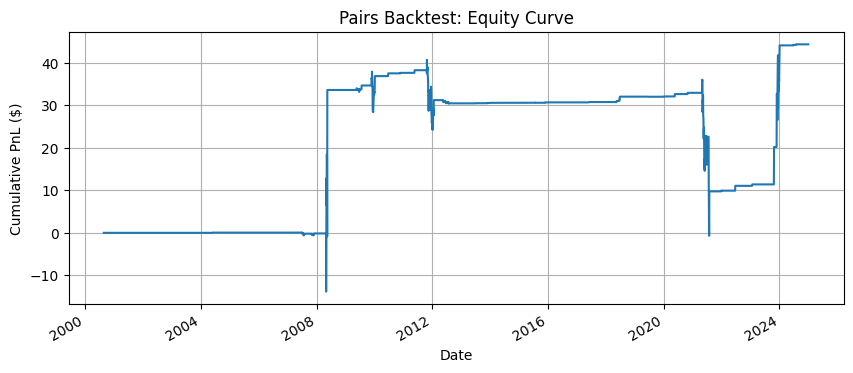

In [46]:
import numpy as np
import pandas as pd

# ---------- helpers ----------
def spread_series(prices_A, prices_B, h):
    """Spread S_t = P_A - h * P_B (uses price levels)."""
    return prices_A - h * prices_B

def rolling_zscore(x: pd.Series, lookback: int = 60, min_periods: int = None):
    if min_periods is None:
        min_periods = lookback // 2
    m = x.rolling(lookback, min_periods=min_periods).mean()
    s = x.rolling(lookback, min_periods=min_periods).std(ddof=0)
    z = (x - m) / s
    return z

def max_drawdown(equity: pd.Series):
    cummax = equity.cummax()
    dd = equity - cummax
    mdd = dd.min()
    # also return % drawdown relative to peak equity
    pct = (equity / cummax - 1.0).min()
    return mdd, pct

# ---------- core backtest ----------
def backtest_top_pairs_zband(
    prices: pd.DataFrame,
    selected_pairs_df: pd.DataFrame,
    top_k: int = 3,
    lookback: int = 60,
    entry_low: float = 2.0,
    entry_high: float = 3.0,
    exit_z: float = 0.5,
    stop_z: float = 3.0,
    max_hold_days: int = 30,
    tc_bps: float = 1.0,  # per trade *per side* in basis points
):
    """
    prices: wide DF of Close prices (columns are tickers).
    selected_pairs_df: output of implement_pair_trading_strategy (at least columns: Trading Period Start, Pair, Hedge Ratio (h), GHE_q1).
    top_k: number of pairs per period to trade (by lowest GHE_q1).
    """

    # ensure sorted
    prices = prices.sort_index()
    selected_pairs_df = selected_pairs_df.sort_values(["Trading Period Start", "GHE_q1"]).reset_index(drop=True)

    # find period windows (each start to next start-1d)
    period_starts = sorted(selected_pairs_df["Trading Period Start"].unique())
    # if last period has no "next", use data end
    period_ends = []
    for i, t0 in enumerate(period_starts):
        if i < len(period_starts) - 1:
            period_ends.append(period_starts[i+1] - pd.Timedelta(days=1))
        else:
            period_ends.append(prices.index.max())
    period_windows = list(zip(period_starts, period_ends))

    # outputs
    daily_pnl = pd.Series(0.0, index=prices.index)
    trade_log = []  # one row per completed or stopped trade

    # walk periods
    for (t0, t1) in period_windows:
        # pick top_k pairs for this start by lowest GHE
        block = selected_pairs_df[selected_pairs_df["Trading Period Start"] == t0]
        if block.empty:
            continue
        block = block.nsmallest(top_k, "GHE_q1")

        # trading window dates
        widx = prices.loc[(prices.index >= t0) & (prices.index <= t1)].index
        if len(widx) < lookback + 5:
            # not enough data to compute rolling stats robustly
            continue

        for _, row in block.iterrows():
            a, b = row["Pair"]
            h = row["Hedge Ratio (h)"]

            # skip if either price missing in window
            pxA = prices[a].reindex(widx).dropna()
            pxB = prices[b].reindex(widx).dropna()
            widx_ab = pxA.index.intersection(pxB.index)
            pxA, pxB = pxA.reindex(widx_ab), pxB.reindex(widx_ab)

            if len(widx_ab) < lookback + 5:
                continue

            spread = spread_series(pxA, pxB, h)
            z = rolling_zscore(spread, lookback=lookback)
            # day-to-day spread change:
            dS = spread.diff().fillna(0.0)

            # position state machine
            pos = 0    # +1 = long spread, -1 = short spread
            entry_date = None
            entry_notional = None
            entry_z = None
            hold = 0

            # costs per side on notional defined at entry as |A| + h*|B|
            def notional_for_date(dt):
                return abs(pxA.loc[dt]) + h * abs(pxB.loc[dt])

            for i, dt in enumerate(widx_ab):
                zt = z.loc[dt]
                # entry condition: in the band [2,3)
                if pos == 0 and pd.notna(zt) and entry_low <= abs(zt) < entry_high:
                    # direction: if z > 0, spread is above mean -> short spread; if z < 0 -> long spread
                    pos = -1 if zt > 0 else 1
                    entry_date = dt
                    entry_z = zt
                    entry_notional = float(notional_for_date(dt))
                    # pay entry cost (one side): tc_bps bp * notional
                    daily_pnl.loc[dt] += -(tc_bps / 1e4) * entry_notional
                    hold = 0
                    continue

                # if in a trade, accrue pnl from dS
                if pos != 0 and i > 0:
                    # pnl from spread change
                    daily_pnl.loc[dt] += pos * dS.loc[dt]

                # exit checks
                if pos != 0:
                    hold += 1
                    exit_cond = False
                    reason = None

                    if pd.notna(zt) and abs(zt) <= exit_z:
                        exit_cond, reason = True, "revert"
                    if pd.notna(zt) and abs(zt) >= stop_z:
                        exit_cond, reason = True, "stop"
                    if hold >= max_hold_days:
                        exit_cond, reason = True, "time"

                    if exit_cond:
                        # pay exit cost
                        if entry_notional is None:
                            entry_notional = float(notional_for_date(dt))
                        daily_pnl.loc[dt] += -(tc_bps / 1e4) * entry_notional

                        # record trade
                        # realized PnL for the trade = sum of per-day pnl between entry(excl) and exit(incl)
                        # We approximate by difference in spread from entry to exit, times pos, minus costs:
                        S_entry = spread.loc[entry_date]
                        S_exit = spread.loc[dt]
                        gross = pos * (S_exit - S_entry)
                        costs = (tc_bps / 1e4) * entry_notional * 2.0
                        realized = gross - costs
                        ret = realized / entry_notional if entry_notional else np.nan

                        trade_log.append({
                            "pair": (a, b),
                            "period_start": t0,
                            "entry_date": entry_date,
                            "exit_date": dt,
                            "direction": "long_spread" if pos == 1 else "short_spread",
                            "entry_z": float(entry_z) if entry_z is not None else np.nan,
                            "exit_z": float(zt) if pd.notna(zt) else np.nan,
                            "hold_days": hold,
                            "gross_pnl_$": float(gross),
                            "txn_cost_$": float(costs),
                            "net_pnl_$": float(realized),
                            "notional_$": float(entry_notional),
                            "return_%": float(ret * 100.0) if pd.notna(ret) else np.nan,
                            "exit_reason": reason,
                        })

                        # flat
                        pos = 0
                        entry_date = None
                        entry_notional = None
                        entry_z = None
                        hold = 0

    # build equity and stats
    equity = daily_pnl.cumsum().fillna(method="ffill").fillna(0.0)
    trades = pd.DataFrame(trade_log)
    if not trades.empty:
        total_net = trades["net_pnl_$"].sum()
        wins = (trades["net_pnl_$"] > 0).mean() if len(trades) else np.nan
        avg_ret = trades["return_%"].mean()
        mdd_abs, mdd_pct = max_drawdown(equity)
        # annualization (daily)
        daily_ret = daily_pnl / (equity.shift(1).replace(0, np.nan).abs() + 1e-9)  # defensive; or skip this entirely
        # Alternatively compute Sharpe on PnL scaled by notional per trade; to keep simple:
        sharpe = (daily_pnl.mean() / (daily_pnl.std(ddof=1) + 1e-12)) * np.sqrt(252) if daily_pnl.std(ddof=1) > 0 else np.nan

        summary = {
            "total_net_pnl_$": float(total_net),
            "num_trades": int(len(trades)),
            "win_rate": float(wins) if pd.notna(wins) else np.nan,
            "avg_trade_return_%": float(avg_ret) if pd.notna(avg_ret) else np.nan,
            "max_drawdown_$": float(mdd_abs),
            "max_drawdown_%": float(mdd_pct * 100.0),
            "daily_sharpe_on_pnl": float(sharpe),
        }
    else:
        summary = {
            "total_net_pnl_$": 0.0,
            "num_trades": 0,
            "win_rate": np.nan,
            "avg_trade_return_%": np.nan,
            "max_drawdown_$": 0.0,
            "max_drawdown_%": 0.0,
            "daily_sharpe_on_pnl": np.nan,
        }

    return {
        "daily_pnl": daily_pnl,
        "equity": equity,
        "trades": trades,
        "summary": summary,
    }

# ---------- run it ----------
# Use your selection results (change n_pairs_to_select in selection step to something reasonable; we’ll still trade top_k=3)
# If your existing selection used n_pairs_to_select=1, re-run with >=3 to ensure we have enough candidates.
# selection = implement_pair_trading_strategy(commod_data, n_pairs_to_select=10)

results = backtest_top_pairs_zband(
    prices=commod_data,
    selected_pairs_df=strategy_results,
    top_k=10,          # trade the top 3 pairs (lowest GHE per period)
    lookback=120,      # rolling z-score window
    entry_low=2.0,    # enter when 2 ≤ |z| < 3
    entry_high=3.0,
    exit_z=1,       # exit on reversion
    stop_z=3.0,       # stop if |z| ≥ 3
    max_hold_days=180, # time stop
    tc_bps=0       # ~1bp per side (tweak)
)

print("SUMMARY:", results["summary"])
print("\nTRADES (head):")
print(results["trades"].head())

# Optional: plot equity (if you're in a notebook)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
results["equity"].plot()
plt.title("Pairs Backtest: Equity Curve")
plt.xlabel("Date")
plt.ylabel("Cumulative PnL ($)")
plt.grid(True)
plt.show()
